**Import Libarires**

In [2]:
import pandas as pd
import numpy as np


**Load the dataset**

In [3]:
words = pd.read_csv('/content/Arabic_names.csv')


In [4]:
names_list = words['Name'].tolist()

min_length = min(len(name) for name in names_list)
max_length = max(len(name) for name in names_list)

print(min_length)
print(max_length)

1
26


In [5]:

first_name = words['Name'][0]
chs = ['<S>'] + list(first_name) + ['<E>']
for ch1, ch2 in zip(chs, chs[1:]):
    print(ch1, ch2)


<S> ا
ا ب
ب ت
ت س
س ا
ا م
م <E>


In [6]:
# Get the first 3 names from the dataset
names = words['Name'][:3]

# Loop through each name
for name in names:
    print(f"\nProcessing name: {name}")

    # Prepare characters with <S> and <E>
    chs = ['<S>'] + list(name) + ['<E>']

    # Print each pair
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)



Processing name: ابتسام
<S> ا
ا ب
ب ت
ت س
س ا
ا م
م <E>

Processing name: ابتهاج
<S> ا
ا ب
ب ت
ت ه
ه ا
ا ج
ج <E>

Processing name: ابتهال
<S> ا
ا ب
ب ت
ت ه
ه ا
ا ل
ل <E>


In [7]:
# Dictionary to store bigram counts
b = {}

# Loop over all names
for name in words['Name']:
    # Add <S> and <E> to the name
    chs = ['<S>'] + list(name) + ['<E>']

    # Count bigrams
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

# Print all bigram counts
for bigram, count in b.items():
    print(bigram, count)


('<S>', 'ا') 1490
('ا', 'ب') 441
('ب', 'ت') 20
('ت', 'س') 16
('س', 'ا') 198
('ا', 'م') 367
('م', '<E>') 547
('ت', 'ه') 29
('ه', 'ا') 180
('ا', 'ج') 97
('ج', '<E>') 51
('ا', 'ل') 1628
('ل', '<E>') 438
('ج', 'ت') 6
('ا', 'د') 273
('د', '<E>') 562
('ا', 'ز') 66
('ز', 'د') 2
('د', 'ه') 105
('ا', 'ر') 422
('ر', '<E>') 660
('ا', 'ع') 86
('ع', 'ت') 35
('ت', 'د') 7
('د', 'ا') 676
('ت', 'م') 33
('م', 'ا') 376
('ا', 'ف') 128
('ف', 'ت') 67
('ت', 'خ') 3
('خ', 'ا') 40
('ت', 'ك') 9
('ك', 'ا') 109
('ل', 'ب') 133
('ت', 'و') 92
('و', 'ل') 140
('ب', 'ن') 37
('ن', 'د') 146
('د', 'ر') 127
('ر', 'ي') 455
('ي', '<E>') 652
('ل', 'ج') 75
('ج', 'ا') 140
('ز', 'ي') 133
('ج', 'و') 110
('و', 'ر') 232
('و', 'ه') 70
('ه', 'ر') 92
('ر', 'ة') 37
('ة', '<E>') 350
('ل', 'ر') 91
('ي', 'م') 304
('ل', 'ع') 127
('ع', 'ن') 31
('ن', 'و') 138
('و', 'د') 140
('ل', 'ه') 143
('ه', 'ن') 46
('و', 'ف') 86
('ف', '<E>') 191
('م', 'ت') 51
('ت', 'ث') 3
('ث', 'ا') 32
('ت', 'ي') 86
('ي', 'ا') 315
('ز', '<E>') 97
('ا', 'ن') 630
('ن', 'ب')

In [8]:
import torch
import re

arabic_chars = re.compile(r'[^ءآأؤإئابةتثجحخدذرزسشصضطظعغفقكلمنهويى]')
words['Name'] = words['Name'].apply(lambda x: re.sub(arabic_chars, '', x))

chars = sorted(list(set(''.join(words['Name']))))
chars = ['.', '!'] + chars

stoi = {s: i for i, s in enumerate(chars)}
itos = {i: s for s, i in stoi.items()}

vocab_size = len(stoi)
N = torch.zeros((vocab_size, vocab_size), dtype=torch.int32)

for name in words['Name']:
    chs = ['.'] + list(name) + ['!']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


In [9]:
itos = {i: s for s, i in stoi.items()}


In [10]:
stoi

{'.': 0,
 '!': 1,
 'ء': 2,
 'آ': 3,
 'أ': 4,
 'ؤ': 5,
 'إ': 6,
 'ئ': 7,
 'ا': 8,
 'ب': 9,
 'ة': 10,
 'ت': 11,
 'ث': 12,
 'ج': 13,
 'ح': 14,
 'خ': 15,
 'د': 16,
 'ذ': 17,
 'ر': 18,
 'ز': 19,
 'س': 20,
 'ش': 21,
 'ص': 22,
 'ض': 23,
 'ط': 24,
 'ظ': 25,
 'ع': 26,
 'غ': 27,
 'ف': 28,
 'ق': 29,
 'ك': 30,
 'ل': 31,
 'م': 32,
 'ن': 33,
 'ه': 34,
 'و': 35,
 'ى': 36,
 'ي': 37}

(np.float64(-0.5), np.float64(37.5), np.float64(37.5), np.float64(-0.5))

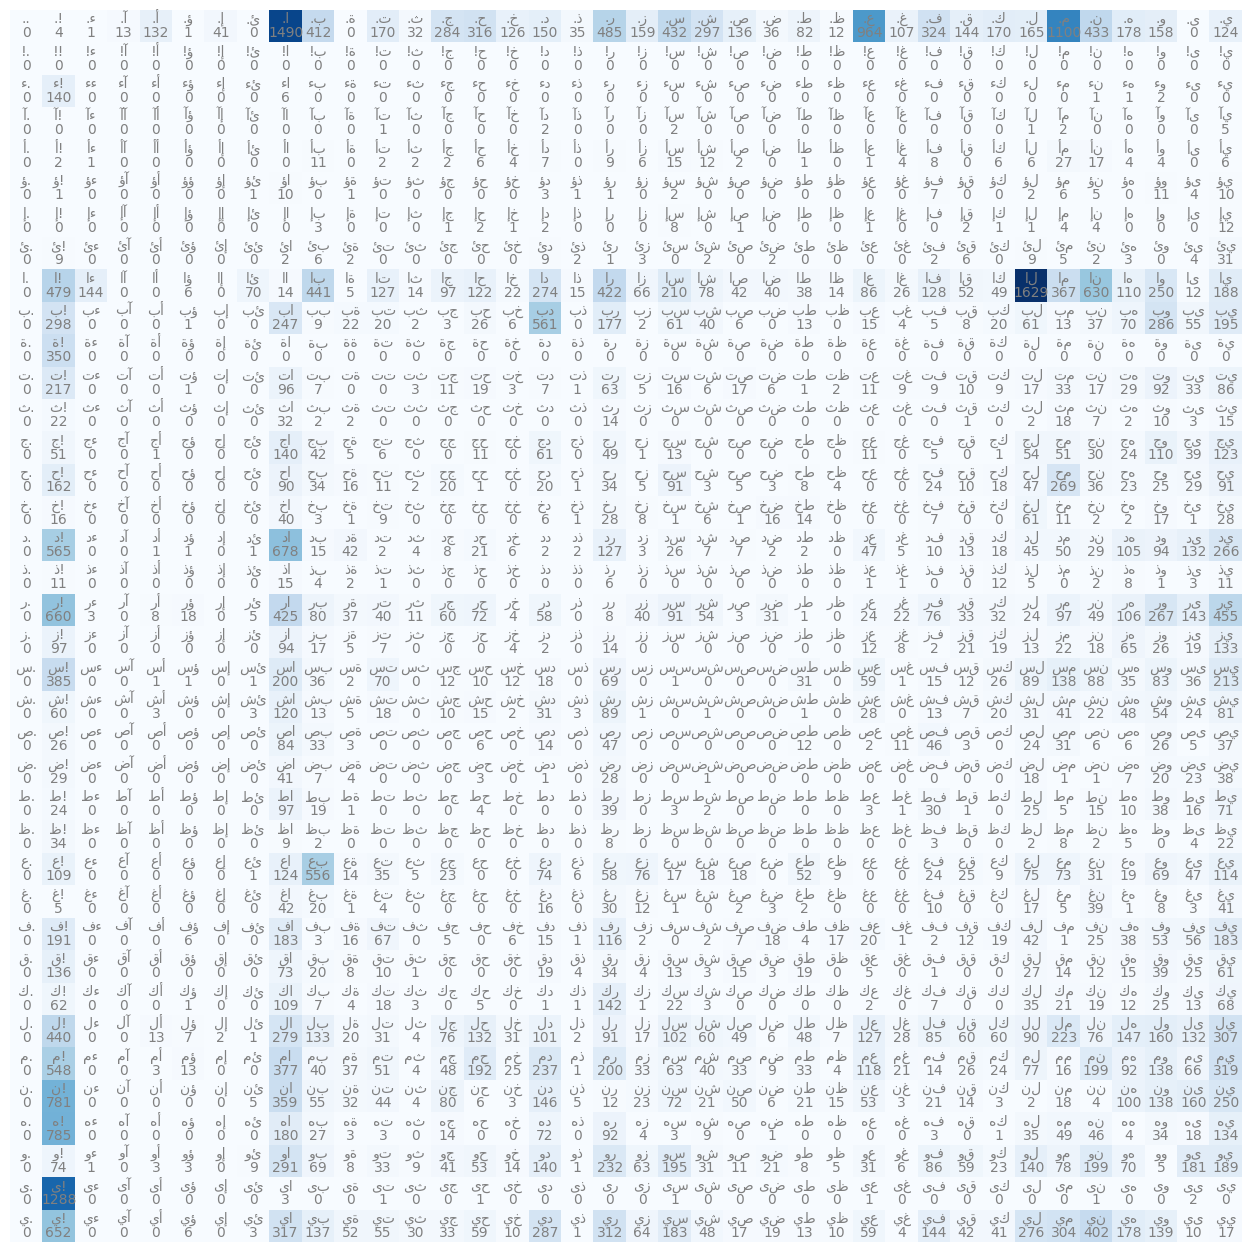

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

vocab_size = len(itos)

for i in range(vocab_size):
    for j in range(vocab_size):
        chstr = itos.get(i, '?') + itos.get(j, '?')
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')

plt.axis('off')


In [12]:
g= torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g)
p=p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [13]:
ix=torch.multinomial(p, num_samples=8, replacement=True, generator=g)
ix

tensor([1, 1, 2, 0, 0, 2, 1, 1])

In [14]:
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
print(itos[ix.item()])

!


In [15]:
p.shape

torch.Size([3])

In [16]:
p.sum(0 , keepdim=True).shape

torch.Size([1])

In [17]:
p=N.float()

In [18]:
g = torch.Generator().manual_seed(2147483647)

for i in range(30):
    out = []
    ix = stoi['.']
    while True:
        p = N[ix].float()
        p = p ** 1.2

        if p.sum() == 0:
            p = torch.ones_like(p)

        p = p / p.sum()

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        next_char = itos[ix]

        if next_char == '!':
            break

        out.append(next_char)

    print(''.join(out))


مشفة
امي
ا
عبالد
اي
ند
مون
ن
ابرفالني
لميهاوسى
باح
الف
مى
ه
ا
ودييم
بارضبدى
مز
عى
ح
عب
ميمعب
صف
جام
إيسكوجدردام
زى
ان
ع
عبدالب
فظ


In [19]:
log_likelihood=0.0
n=0
# Add 1 to all counts for Laplace smoothing
P = (N + 1).float()
# Normalize to get probabilities
P /= P.sum(1, keepdims=True)


for w in words['Name']:
  chs=['.']+list(w)+['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2] # Use the smoothed and normalized probabilities
    logprob=torch.log(prob)
    log_likelihood=log_likelihood+logprob

    n=n+1
print(f'{n=} {log_likelihood=}')
nll=-log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

n=52944 log_likelihood=tensor(-192476.5156)
nll=tensor(192476.5156)
3.6354737281799316


In [20]:
xs, ys = [], []

name = words['Name'][0]
chs = ['.'] + list(name) + ['.']
for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


. ا
ا ب
ب ت
ت س
س ا
ا م
م .


In [21]:
xs

tensor([ 0,  8,  9, 11, 20,  8, 32])

In [22]:
ys

tensor([ 8,  9, 11, 20,  8, 32,  0])

In [23]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=vocab_size).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.

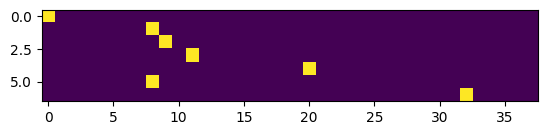

In [24]:
plt.imshow(xenc)

In [25]:
xenc.shape

torch.Size([7, 38])

In [26]:
#intialize vocab_size neuron's weights
g=torch.Generator().manual_seed(2147483647)
W=torch.randn((vocab_size,vocab_size),generator=g, requires_grad=True)


In [27]:
#probs.shape

In [28]:
nlls = torch.zeros(len(xs))
for i in range(len(xs)):
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index

  # Calculate logits and probabilities for the current input character
  xenc = F.one_hot(torch.tensor([x]), num_classes=vocab_size).float()
  logits = xenc @ W
  probs = F.softmax(logits, dim=1)

  print('--------')
  print(f'input: {itos[x]}')
  print(f'label: {itos[y]}')

  # Get the probability of the actual next character (label)
  p = probs[0, y]
  print(f'probability: {p.item()}')
  logp = torch.log(p)
  print(f'log: {logp.item()}')
  nll = -logp
  print(f'nll: {nll.item()}')
  nlls[i] = nll
  print('--------')

print(f'Mean NLL: {nlls.mean().item()}')

--------
input: .
label: ا
probability: 0.011652887798845768
log: -4.4522013664245605
nll: 4.4522013664245605
--------
--------
input: ا
label: ب
probability: 0.019225629046559334
log: -3.9515111446380615
nll: 3.9515111446380615
--------
--------
input: ب
label: ت
probability: 0.02868940308690071
log: -3.551227569580078
nll: 3.551227569580078
--------
--------
input: ت
label: س
probability: 0.028382450342178345
log: -3.5619843006134033
nll: 3.5619843006134033
--------
--------
input: س
label: ا
probability: 0.004432890098541975
log: -5.418703556060791
nll: 5.418703556060791
--------
--------
input: ا
label: م
probability: 0.03244055435061455
log: -3.4283459186553955
nll: 3.4283459186553955
--------
--------
input: م
label: .
probability: 0.005630143918097019
log: -5.179620265960693
nll: 5.179620265960693
--------
Mean NLL: 4.220513343811035


In [29]:
# Create a list to store all bigrams
bigrams = []
for name in words['Name']:
    chs = ['.'] + list(name) + ['!']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigrams.append((ch1, ch2))

xs = [stoi[ch1] for ch1, ch2 in bigrams]
ys = [stoi[ch2] for ch1, ch2 in bigrams]

xs = torch.tensor(xs, dtype=torch.long)
ys = torch.tensor(ys, dtype=torch.long)

xenc = F.one_hot(xs, num_classes=vocab_size).float()

In [30]:
import torch
import torch.nn.functional as F

W = torch.randn((vocab_size, vocab_size), requires_grad=True)

# forward
xenc = F.one_hot(xs, num_classes=vocab_size).float()
logits = xenc @ W
probs = F.softmax(logits, dim=1)
loss = F.nll_loss(probs.log(), ys)

# backward
W.grad = None
loss.backward()


In [31]:
W.grad

tensor([[ 4.0490e-02,  1.0127e-03,  1.4063e-03,  ..., -2.1737e-03,
          6.4609e-03,  1.1014e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 4.3764e-04, -2.6088e-03,  4.6594e-05,  ...,  6.6183e-06,
          4.6606e-05,  5.1739e-05],
        ...,
        [ 3.4696e-03, -7.6200e-04,  8.7985e-04,  ...,  1.9254e-03,
         -3.1218e-03, -2.4887e-03],
        [ 2.2229e-03, -2.4229e-02,  1.6611e-04,  ...,  2.5121e-04,
          3.4849e-04,  1.3049e-04],
        [ 4.2435e-04, -1.2019e-02,  6.5707e-04,  ..., -2.3565e-03,
          7.0732e-03,  1.3088e-03]])

In [32]:
import torch
import torch.nn.functional as F

hidden_size = 100

W1 = torch.randn((vocab_size, hidden_size), requires_grad=True)
b1 = torch.randn(hidden_size, requires_grad=True)

W2 = torch.randn((hidden_size, vocab_size), requires_grad=True)
b2 = torch.randn(vocab_size, requires_grad=True)

# forward
xenc = F.one_hot(xs, num_classes=vocab_size).float()
h = torch.tanh(xenc @ W1 + b1)
logits = h @ W2 + b2
probs = F.softmax(logits, dim=1)

# loss
loss = F.nll_loss(probs.log(), ys)

# backward
for param in [W1, b1, W2, b2]:
    param.grad = None
loss.backward()


In [33]:
import torch

g = torch.Generator().manual_seed(2147)

for i in range(30):
    out = []
    ix = stoi['.']
    while True:
        p = N[ix].float()

        if '!' in stoi:
            p[stoi['!']] = 0.0

        if p.sum() == 0:
            p = torch.ones_like(p)
            if '!' in stoi:
                p[stoi['!']] = 0.0

        p = p ** 1.0
        p = p / p.sum()

        ix = torch.multinomial(p, num_samples=1, generator=g).item()
        next_char = itos[ix]

        if next_char == '.' or len(out) > 3:
            out.append('.')
            break

        out.append(next_char)

    print(''.join(out))


مىىى.
مغرا.
منيب.
نزها.
لاجم.
سعمد.
عالا.
فيهج.
شلغف.
شديم.
فيمض.
ابرف.
نيمح.
مدال.
رؤلل.
هاضي.
عنعط.
شالح.
معبد.
ثابد.
آيسل.
سحهت.
بعبر.
بسطا.
انبو.
زابى.
ايدا.
ثالط.
ديفا.
نالا.



Using RNN


In [34]:
import torch

# تحويل الأسماء إلى تسلسل من الحروف
X, Y = [], []
for name in words['Name']:
    chs = ['.'] + list(name) + ['!']
    for ch1, ch2 in zip(chs, chs[1:]):
        X.append(stoi[ch1])
        Y.append(stoi[ch2])

xs = torch.tensor(X)
ys = torch.tensor(Y)


In [35]:
if '.' not in stoi:
    stoi['.'] = len(stoi)
if '!' not in stoi:
    stoi['!'] = len(stoi)

chs = ['.'] + list(name) + ['!']
for i in range(len(chs) - 1):
    X.append(stoi[chs[i]])
    Y.append(stoi[chs[i + 1]])


In [44]:
import torch.nn as nn

class BigramRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=16, hidden_size=32):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        output, hidden = self.rnn(x, hidden)
        logits = self.fc(output)
        return logits.squeeze(1), hidden


In [45]:
class BigramRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=16, hidden_size=32):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        output, hidden = self.rnn(x, hidden)
        logits = self.fc(output)
        return logits.squeeze(1), hidden


In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

# Ensure necessary variables are defined (assuming they are from previous cells)
# vocab_size, stoi, itos, xs, ys

class BigramRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=32, hidden_size=64):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)
        return out, hidden

# Create the model, optimizer, and loss function
model = BigramRNN(vocab_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

# Training loop
for epoch in range(200):
    # Get only the logits from the model's output
    logits, _ = model(xs)
    loss = loss_fn(logits, ys)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 3.6617
Epoch 20, Loss: 2.4872
Epoch 40, Loss: 2.3623
Epoch 60, Loss: 2.2972
Epoch 80, Loss: 2.2513
Epoch 100, Loss: 2.2164
Epoch 120, Loss: 2.1835
Epoch 140, Loss: 2.1547
Epoch 160, Loss: 2.1320
Epoch 180, Loss: 2.1085


In [63]:
import torch

g = torch.Generator().manual_seed(2147)

for i in range(40):
    out = []
    ix = stoi['.']  # بداية الاسم
    hidden = None   # الحالة الابتدائية للـ RNN

    while True:
        x = torch.tensor([[ix]])
        logits, hidden = model(x, hidden)
        logits = logits[0, -1]  # نأخذ آخر خطوة
        probs = torch.softmax(logits, dim=0)

        # اختاري الحرف التالي عشوائيًا بناء على التوزيع
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        next_char = itos[ix]

        if next_char == '!':  # نهاية الاسم
            break
        if next_char == '.' or len(out) > 20:  # احتياطًا لو حصلت دورة مالهاش نهاية
            break

        out.append(next_char)

    print(''.join(out))


موراعيل
المعيبدولا
الاجمن
عبدالموسانيه
ابوغف
شقيم
حوماسهات
حنيم
شهد
زمريل
فهاضي
عنوري
الحنان
عبدالهداوى
اسحهت
بسخرو
سعان
نبول
ابى
ايدرس
محمدين
مقلا
الحبدان
امامه
حبن
محموي
بات
عاضوس
عبدالعربيهي
ججيبى
مناره
البوهان
باضع
مرأشى
حاتوف
ابراحيوسيد
بدالعبدالعهيب
نضرمه
المهدى
ارسيل


In [64]:
import torch
import torch.nn as nn

class LSTMNameGenerator(nn.Module):
    def __init__(self, vocab_size, embedding_dim=16, hidden_dim=64):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x, hidden=None):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        logits = self.fc(out)
        return logits.squeeze(1), hidden


In [65]:
model = NameLSTM(vocab_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = nn.CrossEntropyLoss()

BATCH_SIZE = 256

for epoch in range(300):
    total_loss = 0
    for i in range(0, len(xs), BATCH_SIZE):
        xb = xs[i:i+BATCH_SIZE].unsqueeze(1)
        yb = ys[i:i+BATCH_SIZE]

        logits, _ = model(xb)
        loss = loss_fn(logits, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")


Epoch 0, Loss: 571.6349
Epoch 20, Loss: 544.8097
Epoch 40, Loss: 543.9966
Epoch 60, Loss: 543.6941
Epoch 80, Loss: 543.5673
Epoch 100, Loss: 543.5192
Epoch 120, Loss: 543.5021
Epoch 140, Loss: 543.4790
Epoch 160, Loss: 543.4602
Epoch 180, Loss: 543.4539


In [67]:
g = torch.Generator().manual_seed(2147897)

max_length = 30

for _ in range(30):
    out = []
    ch = '.'
    ix = stoi[ch]
    hidden = None

    for _ in range(max_length):
        x = torch.tensor([[ix]])
        logits, hidden = model(x, hidden)
        probs = torch.softmax(logits, dim=-1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        ch = itos[ix]
        if ch == '!':
            break
        out.append(ch)

    print(''.join(out))


جوسنيسجى
كالعيئشم
لفئيويملا
عب
غصن
بدناء
أمدالطاليئ
البوئى
غل
افضاوزيبديد
م
عب
البدواى
علفئلى
هاند
م
الجمالغفؤدا
مكا
ويطل
ارواى
مورانسي
جالجدعيمحمقمجلاحمونه
بيبرس
رم
والرفى
بدخمتجانيروفيص
جاليئي
اداليئيبوى
شه
شعجلكاقصد
